In [1]:
%%capture
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
from PIL import Image
def load_and_preprocess_image(file_path, target_size=(28, 28)):
    image_array = np.array(Image.open(file_path).convert('L').resize(target_size))
    return image_array

2024-05-22 22:48:06.076473: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 22:48:06.141784: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 22:48:06.379196: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 22:48:07.299165: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
class ELM:
    def __init__(self,input_length,num_hidden_nodes,num_output_nodes):
        self.beta = np.zeros((num_hidden_nodes, num_output_nodes))
        # self.beta = np.random.uniform(-1, 1, size=(num_hidden_nodes, num_output_nodes))
        self.w = np.random.uniform(-1, 1, size=(input_length, num_hidden_nodes))
        self.bias = np.random.uniform(-1, 1, size=(num_hidden_nodes))
    
        print('Bias shape:', self.bias.shape)
        print('W shape:', self.w.shape)
        print('Beta shape:', self.beta.shape)

    def activation_sigmoid(self,x):
        return 1. / (1. + np.exp(-x))
        # return np.maximum(0, x)


    def fit(self, X, Y):
        H = self.activation_sigmoid(X.dot(self.w) + self.bias)
        H_pinv = np.linalg.pinv(H)
        self.beta = H_pinv.dot(Y)
    
    def pred(self, X):
        predicts = self.activation_sigmoid(X.dot(self.w) + self.bias)
        return np.argmax(predicts.dot(self.beta),axis=-1)

    def acc(self, predictss, Y):
        acc = np.sum(predictss == Y) / len(Y)
        return acc
    
    def cm(self, predicts, Y):
        conf = confusion_matrix(Y, predicts)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf, annot=True, fmt='d',cbar=False, linewidths=0.5, linecolor='black')
        plt.xlabel('Predykcja')
        plt.ylabel('Rzeczywistość')
        plt.title('Macierz pomyłek')
        plt.show()

    def cm_mod(self, predicts, Y, lower, upper):
        conf = confusion_matrix(Y, predicts)
        mask = np.logical_or(conf < lower, conf > upper)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf, annot=True, fmt='d',cbar=False, mask=mask, cmap='coolwarm', linewidths=0.5, linecolor='black')
        plt.xlabel('Predykcja')
        plt.ylabel('Rzeczywistość')
        plt.title('Macierz pomyłek')
        plt.show()
    
     


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype(np.float32) / 255.
x_train = x_train.reshape(-1, 28**2)
x_test = x_test.astype(np.float32) / 255.
x_test = x_test.reshape(-1, 28**2)

y_train_onehot = to_categorical(y_train, 10).astype(np.float32)
y_test_onehot = to_categorical(y_test, 10).astype(np.float32)

model = ELM(
    28**2,
    2000,
    10
)

print(f'x_train shape = {x_train.shape} \nx_test shape {x_test.shape}')


Bias shape: (2000,)
W shape: (784, 2000)
Beta shape: (2000, 10)
x_train shape = (60000, 784) 
x_test shape (10000, 784)


In [4]:
model.fit(x_train,y_train_onehot)

In [8]:
train_predictions = model.pred(x_train)

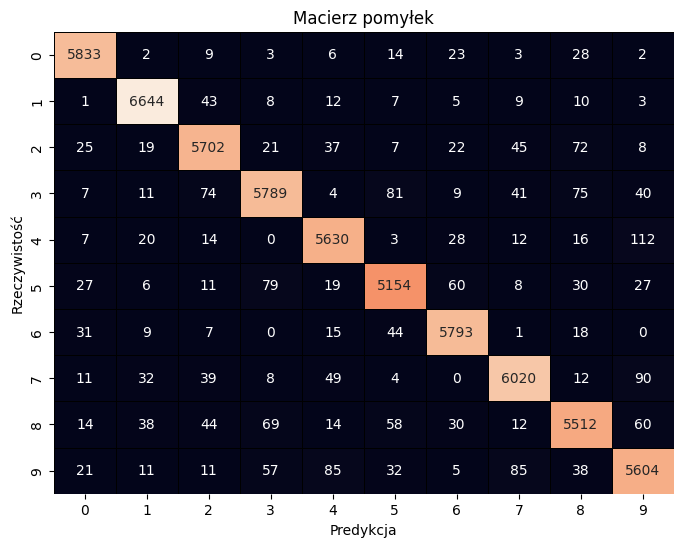

In [9]:
model.cm(train_predictions, y_train)

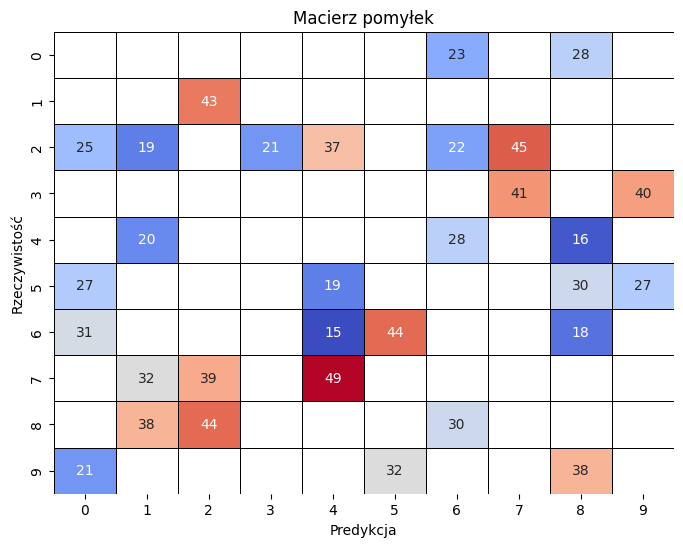

In [10]:
model.cm_mod(train_predictions, y_train, 15, 50)

In [11]:
train_predictions

array([5, 0, 4, ..., 5, 6, 8])

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
train_acc = model.acc(train_predictions,y_train)

In [14]:
train_acc

0.96135

In [15]:
test_predictions = model.pred(x_test)

In [16]:
test_acc = model.acc(test_predictions,y_test)

In [17]:
test_acc

0.9537

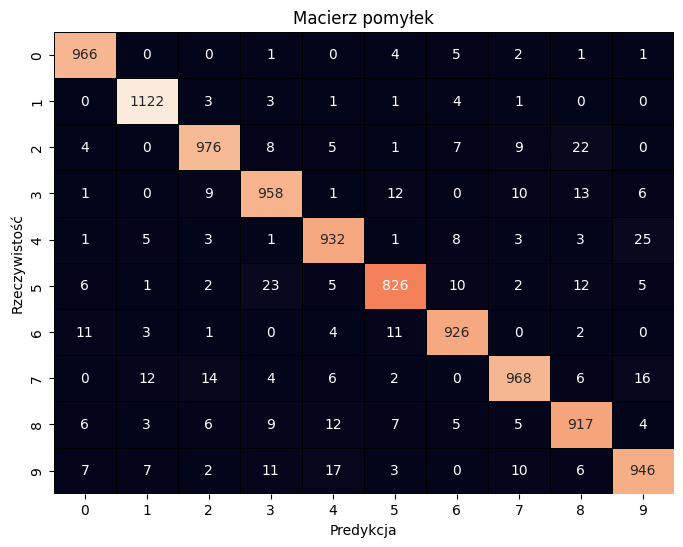

In [18]:
model.cm(test_predictions, y_test)

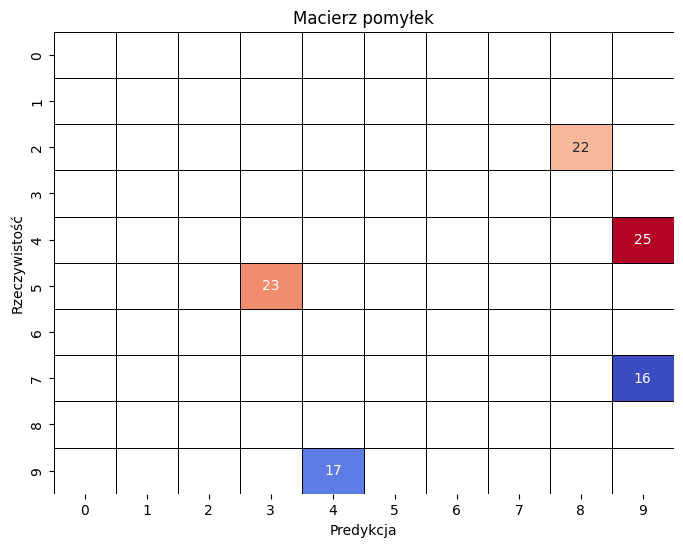

In [19]:
model.cm_mod(test_predictions, y_test, 15, 100)

Ksztalt obrazu: (28, 28), jest to cyfra: 1
Wygląda ona następująco


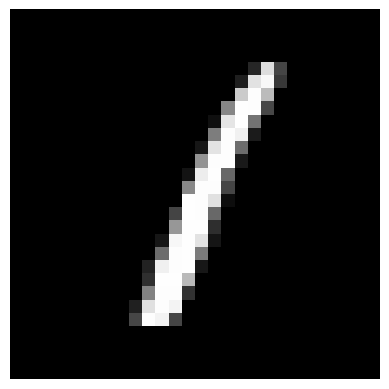

In [25]:
i = random.randint(0,10000)
test = x_test[i].reshape(28,28)
test_y = y_test[i]
# test.shape,test_y
print(f'Ksztalt obrazu: {test.shape}, jest to cyfra: {test_y}\nWygląda ona następująco')
plt.imshow(test, cmap='gray') 
plt.axis('off')
plt.show()

In [26]:
test = x_test[i].reshape(1,-1)

In [39]:
predykcja = model.pred(test)
print(f'Predykcja jest to {predykcja[0]}, co jest zgodne z prawdą.' if predykcja[0] == test_y else f'Predykcja jest to: {predykcja[0]}, co jest niezgodne z prawdą, rzeczywista wartosc to: {test_y}.')

Predykcja jest to 1, co jest zgodne z prawdą.


In [40]:
liczba = load_and_preprocess_image('liczba.jpg')
liczba = liczba.astype(np.float32) / 255.
liczba.shape

(28, 28)

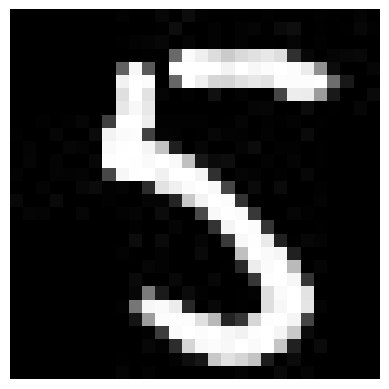

In [41]:
plt.imshow(liczba, cmap='gray') 
plt.axis('off')
plt.show()

In [42]:
liczba = liczba.reshape(-1,28**2)
liczba.shape

(1, 784)

In [43]:
%%capture
predykcja = model.pred(liczba)

In [45]:
print(f'Predykcja jest to {predykcja[0]}')

Predykcja jest to 5
